# TRABAJO DE ANÁLISIS DE REDES SOCIALES

## Carolina Colina Zamorano

## 1. Introducción

#### El objetivo de esta práctica es aplicar el conocimiento sobre Análisis de Redes Complejas adquirido durante estas semanas del curso. Se persigue por encima de todo evaluar el grado de comprensión de las diferentes métricas estudiadas y su aplicación a un caso real, más que la ejecución sistemática de una batería indiscriminada de estadísticos de redes
#### El estudio de la red se centra en la serie Juego de Tronos.

## 2 - Formalización de la red

In [84]:
import numpy as np
import networkx as nx
import warnings
import matplotlib.pyplot as plt
import scipy.stats as sci
import random as rnd
%matplotlib inline

In [85]:
G = nx.Graph()

In [98]:
G.add_nodes_from([
    ("Lord Petyr Baelish", {'casa':'Arryn'}) , 
    ("Jon", {'casa':'Arryn'}) , 
    ("Varys", {'casa':'Arryn'}) ,
    ("Stannis", {'casa':'Baratheon'}) , 
    ("Renly", {'casa':'Baratheon'}) , 
    ("Robert", {'casa':'Baratheon'}) , 
    ("Margarey", {'casa':'Tyrell'}) ,
    ("Loras", {'casa':'Tyrell'}) , 
    
    ("Joanna", {'casa':'Lannister'}) , 
    ("Tywin", {'casa':'Lannister'}) , 
    ("Kevan", {'casa':'Lannister'}) , 
    ("Dorna", {'casa':'Lannister'}) , 
    ("Cersei", {'casa':'Lannister'}) , 
    ("Ser Jaime", {'casa':'Lannister'}) , 
    ("Tyrion", {'casa':'Lannister'}) , 
    ("Lancel", {'casa':'Lannister'}) , 
    ("Joffrey", {'casa':'Lannister'}) , 
    ("Mircella", {'casa':'Lannister'}) , 
    ("Tommen", {'casa':'Lannister'}) ,
    
    ("Rickard", {'casa':'Stark'}) , 
    ("Benjen", {'casa':'Stark'}) , 
    ("Lianna", {'casa':'Stark'}) , 
    ("Eddard", {'casa':'Stark'}) , 
    ("Jon Snow", {'casa':'Stark'}) , 
    ("Robb", {'casa':'Stark'}) , 
    ("Sansa", {'casa':'Stark'}) , 
    ("Arya", {'casa':'Stark'}) , 
    ("Bran", {'casa':'Stark'}) , 
    ("Rickon", {'casa':'Stark'}) , 
    
    ("Hoster", {'casa':'Tully'}) , 
    ("Robin", {'casa':'Tully'}) , 
    ("Catelyn", {'casa':'Tully'}) , 
    ("Lysa", {'casa':'Tully'}) , 
    
    ("Theon", {'casa':'Greyjoy'}) , 
    ("Asha", {'casa':'Greyjoy'}) , 
    ("Maron", {'casa':'Greyjoy'}) , 
    ("Rodrik", {'casa':'Greyjoy'}) , 
    
    ("Aeris II", {'casa':'Targaryen'}) , 
    ("Rhaella", {'casa':'Targaryen'}) , 
    ("Elia", {'casa':'Targaryen'}) , 
    ("Rhaegar", {'casa':'Targaryen'}) , 
    ("Viserys", {'casa':'Targaryen'}) , 
    ("Daenerys", {'casa':'Targaryen'}) , 
    ("Rhaenys", {'casa':'Targaryen'}) , 
    ("Aegon", {'casa':'Targaryen'}) , 
])
G.nodes(data='True')

NodeDataView({'Lord Petyr Baelish': None, 'Jon': None, 'Varys': None, 'Stannys': None, 'Renly': None, 'Robert': None, 'Margarey': None, 'Loras': None, 'Joanna': None, 'Tywin': None, 'Kevan': None, 'Dorna': None, 'Cersei': None, 'Ser Jaime': None, 'Tyrion': None, 'Lancel': None, 'Joffrey': None, 'Mircella': None, 'Tommen': None, 'Rickard': None, 'Benjen': None, 'Lianna': None, 'Eddard': None, 'Jon Snow': None, 'Robb': None, 'Sansa': None, 'Arya': None, 'Bran': None, 'Rickon': None, 'Hoster': None, 'Robin': None, 'Catelyn': None, 'Lysa': None, 'Theon': None, 'Asha': None, 'Maron': None, 'Rodrik': None, 'Aeris II': None, 'Rhaella': None, 'Elia': None, 'Rhaegar': None, 'Viserys': None, 'Daenerys': None, 'Rhaenys': None, 'Aegon': None, 'Rob': None, 'Balon': None, 'Lyanna': None, 'Margaery': None, 'Stannis': None}, data='True')

In [99]:
G.add_edges_from([("Lord Petyr Baelish", "Eddard"),("Lord Petyr Baelish", "Catelyn")])
G.add_edges_from([("Jon", "Lysa"),("Jon", "Robin")])
G.add_edges_from([("Lysa", "Catelyn")])
G.add_edges_from([("Rickard", "Benjen"),("Rickard", "Lianna"),("Rickard", "Eddard")])
G.add_edges_from([("Eddard", "Rob"),("Eddard","Sansa"),("Eddard","Arya"),("Eddard","Bran"),("Eddard","Rickon")])
G.add_edges_from([("Robb", "Jon Snow")])
G.add_edges_from([("Balon", "Theon"),("Balon", "Asha"),("Balon", "Maron"),("Balon", "Rodrik")])
G.add_edges_from([("Joanna", "Tywin"),("Tywin", "Kevan"),("Kevan", "Dorna"),("Joanna", "Tyrion"),("Joanna", "Cersei"),("Joanna", "Ser Jaime"),("Tywin", "Ser Jaime"),("Tywin", "Tyrion"),("Tywin", "Cersei")])
G.add_edges_from([("Cersei", "Joffrey"),("Cersei", "Mircella"),("Cersei","Tommen"),("Ser Jaime", "Joffrey"),("Ser Jaime", "Mircella"),("Ser Jaime","Tommen")])
G.add_edges_from([("Kevan", "Lancel"),("Dorna", "Lancel")])
G.add_edges_from([("Balon", "Theon"),("Balon", "Asha"),("Balon", "Maron"),("Balon", "Rodrik")])
G.add_edges_from([("Aeris II", "Rhaegar"),("Aeris II", "Daenerys"),("Rhaella", "Rhaegar"),("Rhaella", "Daenerys")])
G.add_edges_from([("Rhaegar", "Elia"),("Elia", "Rhaegar"),("Rhaegar", "Rhaenys"),("Rhaegar", "Aegon"),("Elia", "Rhaenys"),("Elia", "Aegon")])
G.add_edges_from([("Lord Petyr Baelish", "Eddard"),("Lord Petyr Baelish", "Catelyn")])
G.add_edges_from([("Robert", "Lyanna"),("Robert", "Joffrey")])
G.add_edges_from([("Catelyn", "Sansa"),("Catelyn", "Jon Snow")])
G.add_edges_from([("Jon Snow", "Robb"),("Jon Snow", "Theon")])
G.add_edges_from([("Robb", "Theon")])
G.add_edges_from([("Eddard", "Sansa"),("Sansa", "Joffrey")])
G.add_edges_from([("Bran", "Ser Jaime")])
G.add_edges_from([("Margaery", "Joffrey"),("Margaery", "Tommen")])
G.add_edges_from([("Loras", "Renly"), ("Renly", "Margarey")])
G.add_edges_from([("Joffrey", "Maron"),("Joffrey", "Rodrik")])
G.add_edges_from([("Robert", "Rhaegar"),("Cersei", "Tyrion")])
G.add_edges_from([("Ser Jaime", "Aeris II")])
G.add_edges_from([("Stannis", "Renly"),("Stannis", "Robert")])

In [91]:
sorted(list(nx.degree_centrality(G).items()), key=lambda x:x[1], reverse=True)

[('Ser Jaime', 0.14583333333333331),
 ('Joffrey', 0.14583333333333331),
 ('Eddard', 0.14583333333333331),
 ('Cersei', 0.125),
 ('Rhaegar', 0.125),
 ('Tywin', 0.10416666666666666),
 ('Joanna', 0.08333333333333333),
 ('Catelyn', 0.08333333333333333),
 ('Balon', 0.08333333333333333),
 ('Robert', 0.0625),
 ('Kevan', 0.0625),
 ('Tyrion', 0.0625),
 ('Tommen', 0.0625),
 ('Rickard', 0.0625),
 ('Jon Snow', 0.0625),
 ('Sansa', 0.0625),
 ('Theon', 0.0625),
 ('Aeris II', 0.0625),
 ('Elia', 0.0625),
 ('Lord Petyr Baelish', 0.041666666666666664),
 ('Jon', 0.041666666666666664),
 ('Renly', 0.041666666666666664),
 ('Dorna', 0.041666666666666664),
 ('Lancel', 0.041666666666666664),
 ('Mircella', 0.041666666666666664),
 ('Robb', 0.041666666666666664),
 ('Bran', 0.041666666666666664),
 ('Lysa', 0.041666666666666664),
 ('Maron', 0.041666666666666664),
 ('Rodrik', 0.041666666666666664),
 ('Rhaella', 0.041666666666666664),
 ('Daenerys', 0.041666666666666664),
 ('Rhaenys', 0.041666666666666664),
 ('Aegon', 0

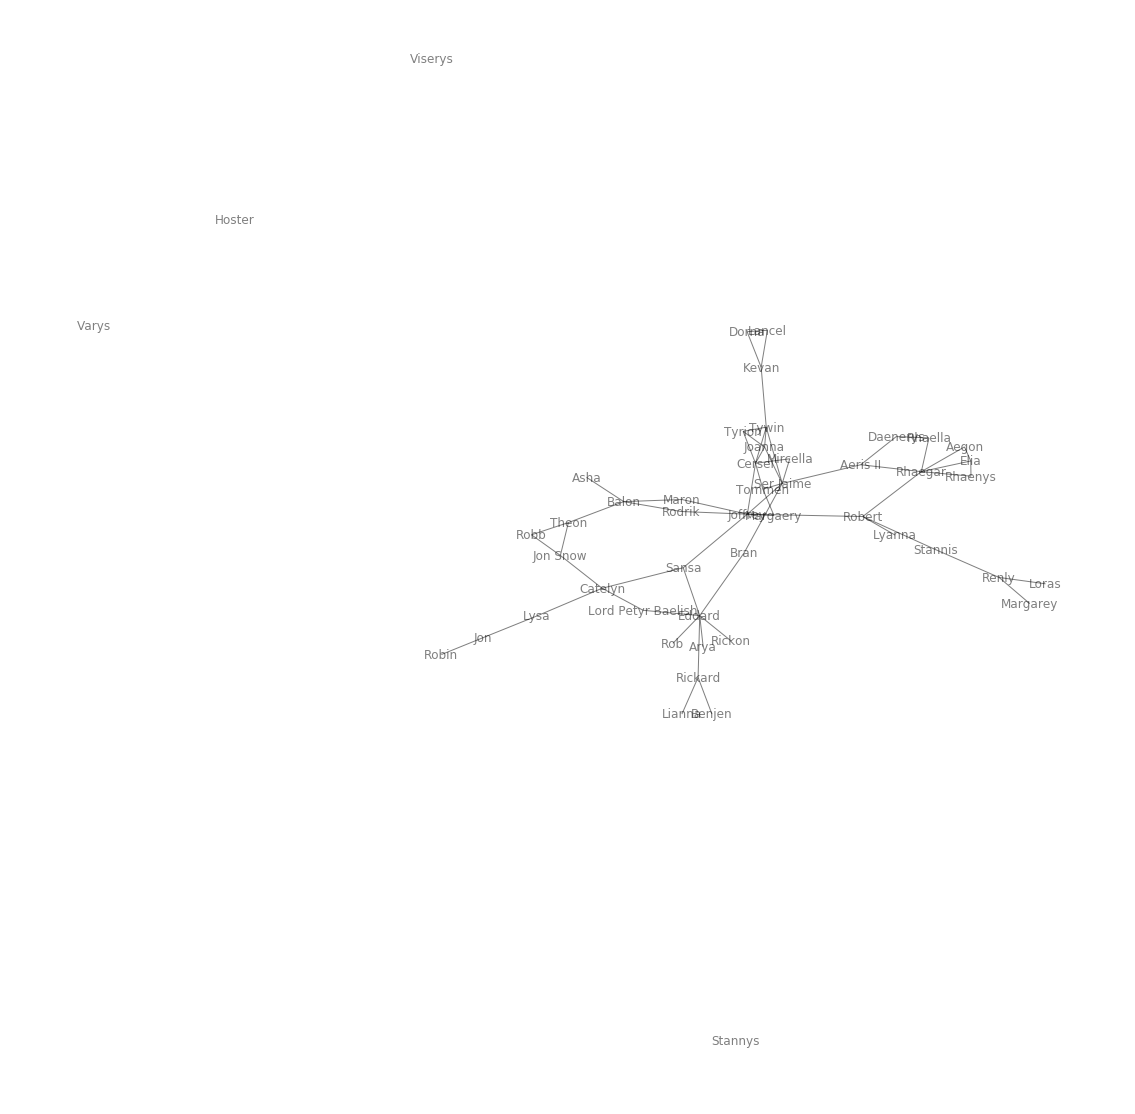

In [118]:
nodoDegree=np.array([x for x in nx.centrality.degree_centrality(G).values()])
pos=nx.fruchterman_reingold_layout(G,k=0.1)
colores_dict={
            'Arryn': 'blue',
            'Baratheon': 'red',
            'Lannister': 'yellow',
            'Stark':'pink',
            'Tyrell':'cyan',
            'Greyjoy':'orange',
            'Targaryen':'green',
            
        }
colores=[]
for a in nx.get_node_attributes(G,'organización').values():
    if a:
        colores.append(colores_dict.get(a))
    else:
        colores.append('black')
with warnings.catch_warnings():
    plt.figure(3,figsize=(15,15)) 
    warnings.simplefilter("ignore")
    nx.draw(G, pos, with_labels=True, node_color=colores, node_size=nodoDegree*5, alpha=0.5)


## 3. Análisis de centralidad

### 3.1 Degree Centrality

In [101]:
print("")
print("Degree centrality:")
sorted(list(nx.degree_centrality(G).items()), key=lambda x:x[1], reverse=True)


Degree centrality:


[('Ser Jaime', 0.14285714285714285),
 ('Joffrey', 0.14285714285714285),
 ('Eddard', 0.14285714285714285),
 ('Cersei', 0.12244897959183673),
 ('Rhaegar', 0.12244897959183673),
 ('Tywin', 0.1020408163265306),
 ('Robert', 0.08163265306122448),
 ('Joanna', 0.08163265306122448),
 ('Catelyn', 0.08163265306122448),
 ('Balon', 0.08163265306122448),
 ('Renly', 0.061224489795918366),
 ('Kevan', 0.061224489795918366),
 ('Tyrion', 0.061224489795918366),
 ('Tommen', 0.061224489795918366),
 ('Rickard', 0.061224489795918366),
 ('Jon Snow', 0.061224489795918366),
 ('Sansa', 0.061224489795918366),
 ('Theon', 0.061224489795918366),
 ('Aeris II', 0.061224489795918366),
 ('Elia', 0.061224489795918366),
 ('Lord Petyr Baelish', 0.04081632653061224),
 ('Jon', 0.04081632653061224),
 ('Dorna', 0.04081632653061224),
 ('Lancel', 0.04081632653061224),
 ('Mircella', 0.04081632653061224),
 ('Robb', 0.04081632653061224),
 ('Bran', 0.04081632653061224),
 ('Lysa', 0.04081632653061224),
 ('Maron', 0.04081632653061224),

#### Esta medida se centra en el número de enlaces con otros nodos. Los nodos que están al principio de la lista, son los que más relaciones tienen. Vemos qué a los nodos de mayor grado les llegan más enlaces.

### 3.2 Eigenvector Centrality

In [102]:
print("")
print("Eigenvector centrality:")
sorted(list(nx.eigenvector_centrality_numpy(G).items()), key=lambda x:x[1], reverse=True)


Eigenvector centrality:


[('Cersei', 0.4169008376158298),
 ('Ser Jaime', 0.41013738322998544),
 ('Tywin', 0.37153942994999861),
 ('Joanna', 0.35140273788721155),
 ('Joffrey', 0.32311129811988359),
 ('Tyrion', 0.27231374981891115),
 ('Tommen', 0.22910098886335378),
 ('Mircella', 0.19758324443336095),
 ('Margaery', 0.13192606161119033),
 ('Aeris II', 0.12744216890766702),
 ('Bran', 0.11656130947055487),
 ('Robert', 0.11077674749505288),
 ('Sansa', 0.10470964418823289),
 ('Kevan', 0.10442427436809845),
 ('Rodrik', 0.08900961872940219),
 ('Maron', 0.089009618729402148),
 ('Rhaegar', 0.085822072590026069),
 ('Eddard', 0.077761569337823605),
 ('Balon', 0.049462585476592602),
 ('Daenerys', 0.037484282976761756),
 ('Catelyn', 0.037417727897111487),
 ('Elia', 0.034204411167893495),
 ('Lancel', 0.032778336339228137),
 ('Dorna', 0.032778336339228116),
 ('Rhaella', 0.029458456910519949),
 ('Rhaenys', 0.028674880411892235),
 ('Aegon', 0.028674880411892218),
 ('Stannis', 0.028287654143152124),
 ('Lord Petyr Baelish', 0.0275

#### Eigenvector Centrality se basa en que la importancia de un nodo depende de la importancia de los nodos que le apuntan, es decir, un nodo es importante si los que le apuntan lo son.

### 3.3 Betweenness centrality

In [103]:
print("")
print("Betweenness centrality:")
sorted(list(nx.betweenness_centrality(G).items()), key=lambda x:x[1], reverse=True)


Betweenness centrality:


[('Joffrey', 0.4350907029478458),
 ('Robert', 0.2551303854875283),
 ('Sansa', 0.24950396825396826),
 ('Ser Jaime', 0.24019274376417227),
 ('Eddard', 0.23356009070294786),
 ('Catelyn', 0.16893424036281177),
 ('Rhaegar', 0.14499716553287983),
 ('Tywin', 0.11319444444444447),
 ('Stannis', 0.10714285714285714),
 ('Aeris II', 0.09095804988662132),
 ('Bran', 0.08985260770975058),
 ('Cersei', 0.08350340136054431),
 ('Balon', 0.07879818594104304),
 ('Renly', 0.07397959183673469),
 ('Rickard', 0.07397959183673469),
 ('Kevan', 0.07312925170068027),
 ('Lysa', 0.07312925170068027),
 ('Maron', 0.046839569160997706),
 ('Rodrik', 0.046839569160997706),
 ('Jon Snow', 0.038973922902494317),
 ('Jon', 0.03741496598639456),
 ('Theon', 0.029478458049886618),
 ('Lord Petyr Baelish', 0.023596938775510203),
 ('Daenerys', 0.006788548752834467),
 ('Joanna', 0.0060515873015873035),
 ('Tommen', 0.0057823129251700685),
 ('Margaery', 0.005385487528344674),
 ('Rhaella', 0.004251700680272108),
 ('Mircella', 0.0006802

#### Los nodos con mayor Betweenness influyen más en la transmisión de información y hacen de enlace entre grupos aislados.

## 4. Características macroscópicas de la red

### 4.1 Componentes de la red

In [104]:
nx.number_connected_components(G)

5

### 4.2. Small world

In [105]:
nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

#### No cumple la propiedad Small world porque no están todos los nodos conectados.

### 4.3. Clustering de la red

In [106]:
np.average(list(nx.clustering(G).values()))

0.18228571428571427

#### Encontramos en la red un coeficiente de clustering bastante bajo, lo cual quiere decir que no es una red muy robusta

### 4.4. Triángulos de la red

In [107]:
sorted(list(nx.triangles(G).items()), key=lambda x:x[1], reverse=True)[0:5]

[('Joanna', 4), ('Tywin', 4), ('Cersei', 3), ('Tyrion', 3), ('Elia', 2)]

## 5. Estructura de la red

### 5.1. Transitividad

In [108]:
nx.transitivity(G)

0.15606936416184972

#### Ttiene una transitividad bastante baja, lo que significa que los nodos no están todos conctados y puede haber clustering

### 5.2.  Relación del grado de los nodos con respecto a los enlaces entre los nodos

In [109]:
nx.degree_assortativity_coefficient(G)

-0.18703471901969884

In [110]:
nx.degree_pearson_correlation_coefficient(G)

-0.18703471901969826

#### El valor que encontramos es pequeño, con los que no habrá una relacción entre los enlaces y el grado de los nodos

### 5.3. Estadísticas de la red

In [111]:
# Número de nodos:
print("Número de nodos:",G.number_of_nodes())

# Número de enlaces:
print("Número de enlaces:",G.number_of_edges())

# Grado medio, mínimo y máximo:
suma = 0
minimo = 999
maximo = 0
for i,j in G.degree():
    suma = suma + j
    if j > maximo:
        maximo = j
    if j < minimo:
        minimo = j
medio = suma/G.number_of_nodes()

print ("Grado Máximo:",maximo)
print ("Grado Mínimmo:",minimo)
print ("Grado Medio:",medio)

Número de nodos: 50
Número de enlaces: 63
Grado Máximo: 7
Grado Mínimmo: 0
Grado Medio: 2.52


### 5.3 - Grupos de vértices

In [112]:
list(nx.clique.find_cliques(G))

[['Kevan', 'Tywin'],
 ['Kevan', 'Lancel', 'Dorna'],
 ['Rodrik', 'Balon'],
 ['Rodrik', 'Joffrey'],
 ['Renly', 'Margarey'],
 ['Renly', 'Loras'],
 ['Renly', 'Stannis'],
 ['Theon', 'Balon'],
 ['Theon', 'Robb', 'Jon Snow'],
 ['Ser Jaime', 'Joffrey'],
 ['Ser Jaime', 'Mircella'],
 ['Ser Jaime', 'Joanna', 'Tywin'],
 ['Ser Jaime', 'Aeris II'],
 ['Ser Jaime', 'Tommen'],
 ['Ser Jaime', 'Bran'],
 ['Lysa', 'Catelyn'],
 ['Lysa', 'Jon'],
 ['Stannys'],
 ['Sansa', 'Joffrey'],
 ['Sansa', 'Eddard'],
 ['Sansa', 'Catelyn'],
 ['Margaery', 'Joffrey'],
 ['Margaery', 'Tommen'],
 ['Daenerys', 'Rhaella'],
 ['Daenerys', 'Aeris II'],
 ['Cersei', 'Joffrey'],
 ['Cersei', 'Tommen'],
 ['Cersei', 'Mircella'],
 ['Cersei', 'Tyrion', 'Tywin', 'Joanna'],
 ['Hoster'],
 ['Rhaegar', 'Robert'],
 ['Rhaegar', 'Elia', 'Rhaenys'],
 ['Rhaegar', 'Elia', 'Aegon'],
 ['Rhaegar', 'Rhaella'],
 ['Rhaegar', 'Aeris II'],
 ['Rickard', 'Lianna'],
 ['Rickard', 'Eddard'],
 ['Rickard', 'Benjen'],
 ['Jon', 'Robin'],
 ['Robert', 'Joffrey'],
 ['Rob